# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 1. Простой анализ данных.

**Правила, <font color="red">прочитайте внимательно</font>:**


* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины. Правила переноса дедлайнов определены в презентации с первого занятия.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Задачи 1 и 2 сдаются в систему Яндекс.Контест. Ссылка на контест в телеграм-боте.


**Сдача задачи 3:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Прислать нужно **ноутбук в формате `ipynb`**.
* Телеграм не разрешает боту получать файлы более **20 Мб**. Если ваше решение весит больше, *заранее* разделите ноутбук на несколько.
* Для выполнения задания **используйте этот ноутбук в качестве основы, ничего не удаляя из него**. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 1.**

---

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 10 баллов
* Задача 2 &mdash; 10 баллов
* Задача 3 &mdash; 80 баллов


Баллы учитываются в <b>обязательной части</b> курса и не влияют на оценку по факультативной части.

In [120]:
# Bot check

# HW_ID: fpmi_ad1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

custom_palette = sns.color_palette("Set2")  # Изменение порядка цветов
custom_palette[0], custom_palette[1] = custom_palette[1], custom_palette[0]

sns.set(style='whitegrid', font_scale=1.3, palette=custom_palette)

### <font color="blue"><i>Легкая часть</i></font>

### Задача 1.

Условие задачи и сдача в системе Яндекс.Контест. Ссылка на контест в телеграм-боте.

---
### Задача 2.

Условие задачи и сдача в системе Яндекс.Контест. Ссылка на контест в телеграм-боте.

---
### Задача 3.

Титаник был крупнейшим пассажирским судном в 1912—1913 годах. Во время первого рейса затонул в северной Атлантике, столкнувшись с айсбергом в ночь с 14 на 15 апреля 1912 года, при этом погибло 1502 из 2224 пассажиров и членов экипажа. Данные о пассажирах были собраны в таблицы, которые можно скачать с <a href="https://www.kaggle.com/c/titanic/data" target="_blank">Kaggle</a>. Эти данные часто используются в качестве обучающих в анализе данных.

На дополнительном занятии 10 февраля будет показан простой пример работы с датасетом Титаник. Сейчас ваша задача &mdash; на основе простого анализа предоставленных данных обучить несколько классификаторов для определения выживших, иначе говоря, получить некоторые приближенные правила определения, выжил пассажир или нет, а также сравнить эти правила по качеству приближения.

#### 1. Подготовка данных

Загрузите данные с помощью `pandas`.

In [122]:
titanic_data = pd.read_csv("train.csv")

Разделите данные по строкам на две части случайным образом в соотношении 7:3. Первую часть мы будем называть *обучающей*, а вторую &mdash; *тестовой*.

In [123]:
np.random.seed(42)  # Задаем случайное состояние для воспроизводимости результатов
indices = np.random.permutation(len(titanic_data))

train_size = int(0.7 * len(titanic_data))

train_indices, test_indices = indices[:train_size], indices[train_size:]

train_data = titanic_data.iloc[train_indices]
test_data = titanic_data.iloc[test_indices]


Из каждой части оставим несколько признаков, с которыми мы будем работать, а также отдельно &mdash; целевой признак. Примените к обеим частям таблицы функцию ниже

In [124]:
features_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target_column = 'Survived'  # Целевой признак

def get_features_and_target(data):
    features = data[features_columns]
    target = data[target_column]
    return features, target

In [125]:
train_features, train_target = get_features_and_target(train_data)
test_features, test_target = get_features_and_target(test_data)

#### 2. Исследование

**Внимание.** Эта часть задачи должна выполняться *исключительно на обучающих данных*. За использование тестовых данных решение не будет оценено.

Проведите визуальный анализ данных чтобы понять, как различные признаки влияют на целевой. Исследовать можно не целиком обучающие данные, а разделить их на две части по одному из признаков, а далее рассматривать каждую часть отдельно. 

*Не забывайте про информативность и эстетичность графиков.*

In [126]:
male_data = train_data[train_data['Sex'] == 'male']
female_data = train_data[train_data['Sex'] == 'female']


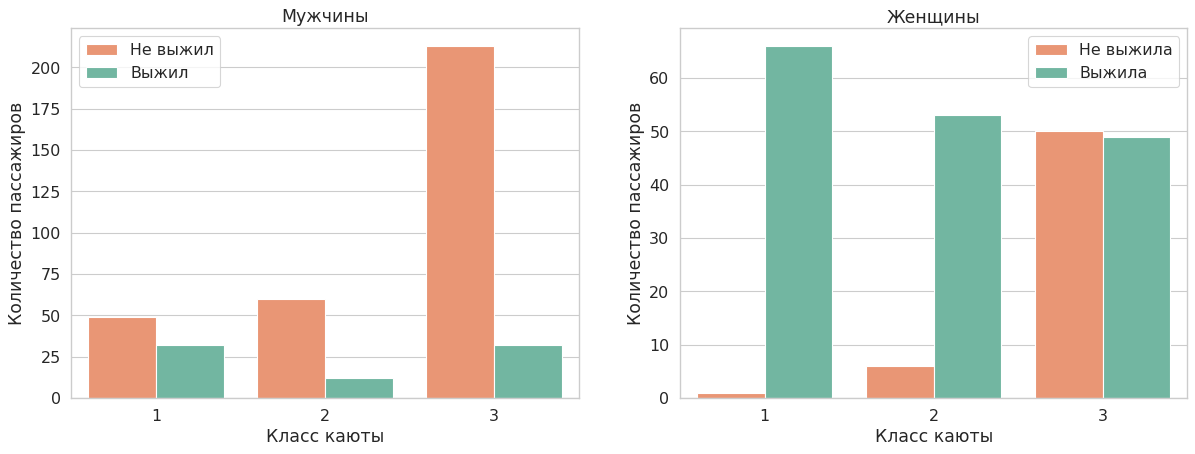

In [127]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6), dpi=80)

sns.countplot(x='Pclass', hue='Survived', data=male_data, ax=axes[0])  # График для мужчин
axes[0].set_title('Мужчины')
axes[0].set_xlabel('Класс каюты')
axes[0].set_ylabel('Количество пассажиров')
axes[0].legend(title='', labels=['Не выжил', 'Выжил'])

sns.countplot(x='Pclass', hue='Survived', data=female_data, ax=axes[1])  # График для женщин
axes[1].set_title('Женщины')
axes[1].set_xlabel('Класс каюты')
axes[1].set_ylabel('Количество пассажиров')
axes[1].legend(labels=['Не выжила', 'Выжила'])

plt.show()


<Figure size 500x350 with 0 Axes>

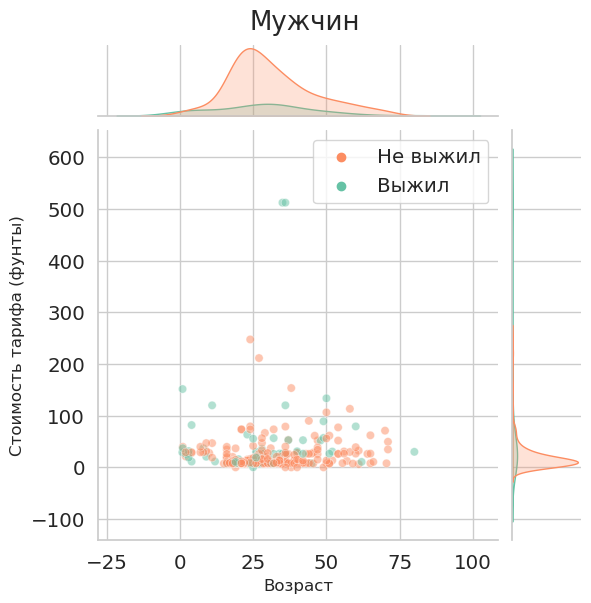

<Figure size 500x350 with 0 Axes>

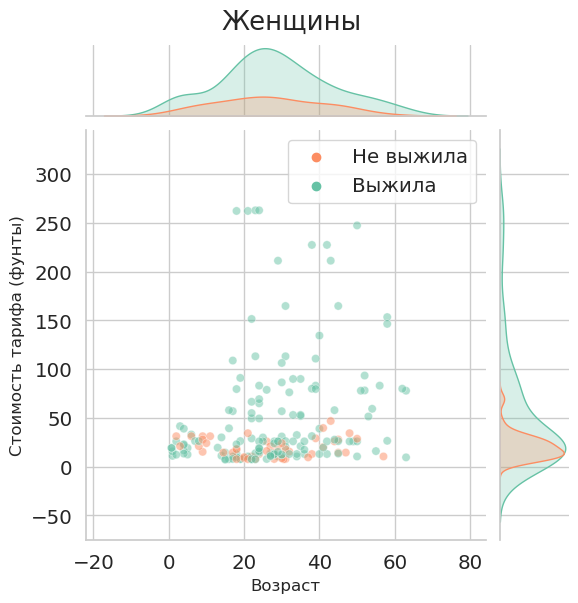

In [128]:
plt.figure(figsize=(10, 7), dpi=50)  # График для мужчин
male_joint = sns.jointplot(x='Age', y='Fare', hue='Survived', data=male_data, alpha=0.5)
male_joint.set_axis_labels('Возраст', 'Стоимость тарифа (фунты)', fontsize=12)
male_joint.ax_joint.get_legend().set_title('')
new_labels_male = ['Не выжил', 'Выжил']
for t, l in zip(male_joint.ax_joint.get_legend().texts, new_labels_male):
    t.set_text(l)
plt.suptitle('Мужчин', y=1.02)


plt.figure(figsize=(10, 7), dpi=50)  # График для женщин
female_joint = sns.jointplot(x='Age', y='Fare', hue='Survived', data=female_data, alpha=0.5, markers=["o", "s"])
female_joint.set_axis_labels('Возраст', 'Стоимость тарифа (фунты)', fontsize=12)
female_joint.ax_joint.get_legend().set_title('')
new_labels_female = ['Не выжила', 'Выжила']
for t, l in zip(female_joint.ax_joint.get_legend().texts, new_labels_female):
    t.set_text(l)
plt.suptitle('Женщины', y=1.02)

plt.show()


/usr/lib/python3/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


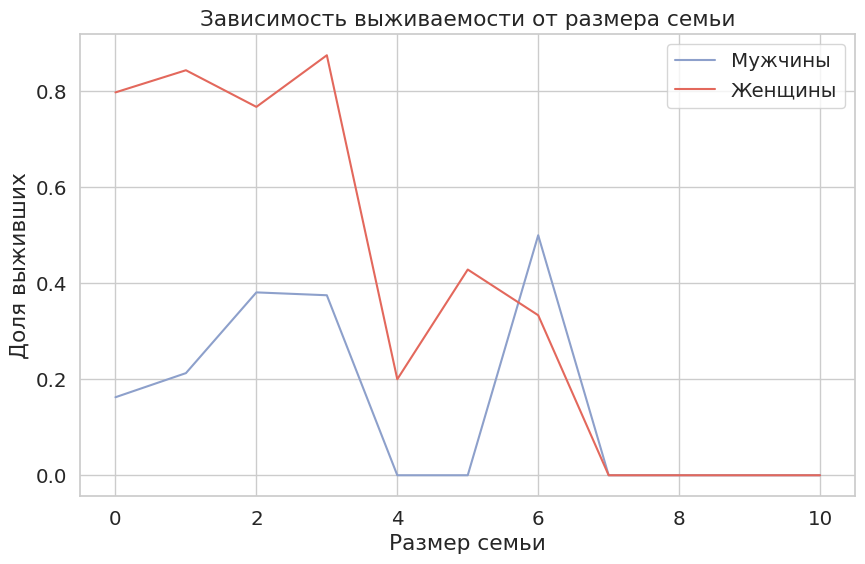

In [129]:
male_data.loc[:, 'FamilySize'] = male_data['SibSp'] + male_data['Parch']
female_data.loc[:, 'FamilySize'] = female_data['SibSp'] + female_data['Parch']

plt.figure(figsize=(10, 6))
sns.lineplot(x='FamilySize', y='Survived', data=male_data, label='Мужчины', ci=None, color=sns.color_palette("Set2")[2])

sns.lineplot(x='FamilySize', y='Survived', data=female_data, label='Женщины', ci=None, color=sns.color_palette("flare")[1])

plt.title('Зависимость выживаемости от размера семьи')
plt.xlabel('Размер семьи')
plt.ylabel('Доля выживших')
plt.legend()

plt.show()

#### 3. Классификация методом ближайшего соседа

Ранее в контесте вы уже реализовали функцию поиска ближайших соседей. Теперь давайте применим ее для решения нашей текущей задачи. 

Реализуйте функцию, которая для каждого объекта тестового набора данных найдет $k$ ближайших соседей из обучающего набора данных, и в качестве ответа возьмет наиболее часто встречающееся значение целевого признака среди найденных соседей. Обратите внимание, что соседей необходимо искать только среди объектов обучающего набора данных.

In [130]:
def knn(features, train_features, train_target, k=1):
    '''
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    на основе обучающего набора данных train_features, train_target.
    Возвращает pandas.Series с теми же индексами, что и у features.
    Число k -- количество соседей.
    '''
    
    predicted = pd.Series(index=features.index, dtype=train_target.dtype)

    for index, test_row in features.iterrows():
        distances = np.sum((train_features - test_row) ** 2, axis=1)
        nearest_neighbors_idx = np.argsort(distances)[:k]
        
        nearest_neighbors_targets = train_target.iloc[nearest_neighbors_idx]
        predicted.loc[index] = nearest_neighbors_targets.mode()[0]
        
    return predicted

Постройте классификатор методом ближайшего соседа, используя только признаки `Age` и `Fare`. 

Какую метрику (функцию расстояния) вы при этом используете? Нужно ли предварительно что-то сделать с признаками?

1. Выбор метрики: Так как у нас числовые признаки (Age и Fare), мы можем использовать евклидово расстояние или другие метрики, такие как L1 норма. Я использовал евклидову метрику

2. Нормализация признаков: Признаки Age и Fare могут иметь различные диапазоны значений, что может повлиять на расстояние. Для корректной работы метода ближайших соседей, часто рекомендуется стандартизировать признаки (привести их к стандартному виду с нулевым средним и единичным стандартным отклонением). Это делается для того, чтобы признаки с разными масштабами не вносили смещение в расстояние между объектами. В моем примере я использовал стандартизацию данных по формуле Z-преобразования: (X - mean) / std, где mean и std - среднее и стандартное отклонение признака соответственно.

In [131]:
selected_features = ['Age', 'Fare']
features = train_data[selected_features]
target = train_data['Survived']

mean_values = features.mean()  # Стандартизация признаков
std_values = features.std()
features_standardized = (features - mean_values) / std_values

k = 3  # Построение классификатора
predicted = knn(features_standardized, features_standardized, target, k)

Как меняется результат классификации при другом количестве соседей? Рассмотрите хотя бы три различных нечетных значения количества соседей.

In [132]:
def evaluate_knn(features, target, k_values):
    for k in k_values:
        predicted = knn(features, features, target, k)
        accuracy = np.mean(predicted == target)
        print(f'Качество для k={k}: {accuracy:.4f}')

k_values = [1, 3, 5]

evaluate_knn(features_standardized, target, k_values)

Качество для k=1: 0.8909
Качество для k=3: 0.7881
Качество для k=5: 0.7255


Точность классификатора, кажется, уменьшается с увеличением количества соседей (k). Вот краткое изложение:

    Для k=1 точность составляет 0.8909.
    Для k=3 точность уменьшается до 0.7881.
    Для k=5 точность еще более снижается до 0.7255.

Эти результаты указывают на то, что с увеличением числа соседей модель становится менее чувствительной к выбросам и шуму в данных. Однако, при этом, с увеличением k может произойти потеря точности. В данном случае, увеличение k приводит к уменьшению точности, что может быть связано с более обобщенным подходом к принятию решений.

Как можно было бы учесть другие признаки? Какие при этом могут возникнуть проблемы? 

1. Можно было бы учесть пол, так как графики выше показывают что женщины выживали с большей долей вероятности нежели мужчины.
2. Размер семьи на борту тоже значительно влияет на результат, так как люди с семьями на борту держались друг за друга и помогали выжить друг другу

Однако, при этом могут возникнуть следующие проблемы:

1. Мультиколлинеарность: Если новые признаки сильно коррелируют между собой или с существующими, это может вызвать проблемы мультиколлинеарности, что затруднит интерпретацию весов признаков и может ухудшить стабильность модели.

2. Переобучение: Добавление большого количества признаков может привести к переобучению модели, особенно если данных мало. В таких случаях важно провести адекватную регуляризацию.
3. Выбросы: Наличие выбросов в новых признаках также может повлиять на результаты моделирования.

Строить классификатор с другими признаками при этом не нужно.

#### 4. Классификация логическими правилами

На основе выше проведенного исследования предложите два разных правила в виде решающего дерева, пример которого можете посмотреть в презентации с первой лекции (классификация котиков). Никакие статистические методы использовать не требуется, только логику и графики.

В данной задаче достаточно, если первое дерево будет иметь максимальную глубину 2, а второе &mdash; глубину 1, и при этом не является поддеревом первого. *Примечание*: дерево из одного листа имеет глубину 0.

Реализуйте полученные деревья по шаблону

**Дерево 1:**

In [133]:
def tree1(features):
    predicted = pd.Series(index=features.index, dtype=int)
    for index, row in features.iterrows():
        if row['Sex'] == 'female':
            predicted[index] = 1  # Выжил
        else:
            family_size = row['SibSp'] + row['Parch']
            if family_size in {1, 2, 3} or family_size == 6:
                predicted[index] = 1  # Выжил
            else:
                predicted[index] = 0  # Не выжил
    return predicted


**Дерево 2:**

In [134]:
def tree2(features):
    predicted = pd.Series(index=features.index, dtype=int)
    for index, row in features.iterrows():
        if row['Pclass'] == 3:
            predicted[index] = 0  # Не выжил
        else:
            if row['Sex'] == 'female':
                predicted[index] = 1  # Выжил
            else:
                predicted[index] = 0  # Не выжил
    return predicted


In [135]:
def tree(features):
    '''
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    Возвращает pandas.Series с теми же индексами, что и у features.
    '''
    
    ...
    return predicted

#### 5. Качество

Вспомним, что у нас имеется тестовая часть выборки. Самое время ее использовать для того, чтобы оценить, насколько хорошими получились деревья. Предложите какой-нибудь критерий качества.

*Замечание*. Не стоит пытаться искать, какие критерии существуют. В данном случае легко предложить адекватный критерий. Стандартные критерии мы разберем позже, но для начала лучше подумать самостоятельно.

**Критерий:**

Оценка точности которая измеряет долю правильных предсказаний по отношению к общему числу наблюдений.

Реализуйте данный критерий по шаблону

In [136]:
def criteria(target, predicted):
    '''
    Вычисление критерия качества для предсказания predicted, 
    если истинные значения -- target.
    Возвращает одно вещественное число.
    '''
    correct_predictions = (target == predicted).sum()
    total_samples = target.shape[0]
    accuracy = correct_predictions / total_samples
    return accuracy

Оцените качество построенных ранее моделей (два дерева, kNN), используя предложенный критерий.

*Примечание.* Полученные значения не влияют на оценку по задание. Оценивается только корректность и обоснованность решения, а также графики и выводы.

In [137]:
predicted_tree1 = tree1(test_data[['Sex', 'Pclass', 'Age', 'SibSp', 'Parch']])
predicted_tree2 = tree2(test_data[['Sex', 'Pclass', 'Age', 'SibSp', 'Parch']])

accuracy_tree1 = criteria(test_data['Survived'], predicted_tree1)
accuracy_tree2 = criteria(test_data['Survived'], predicted_tree2)

print(f"Качество для Дерева 1: {accuracy_tree1:.4f}")
print(f"Качество для Дерева 2: {accuracy_tree2:.4f}")


Качество для Дерева 1: 0.7425
Качество для Дерева 2: 0.7836


Посчитайте значение предложенного ранее критерия качества для метода ближайшего соседа для значений $k$ от 1 до 10. Постройте график зависимости критерия качества от $k$. Как вы можете пояснить полученные результаты?

Качество для k=1: 0.6306
Качество для k=2: 0.6567
Качество для k=3: 0.6157
Качество для k=4: 0.6269
Качество для k=5: 0.6381
Качество для k=6: 0.6642
Качество для k=7: 0.6604
Качество для k=8: 0.6343
Качество для k=9: 0.6604
Качество для k=10: 0.6754


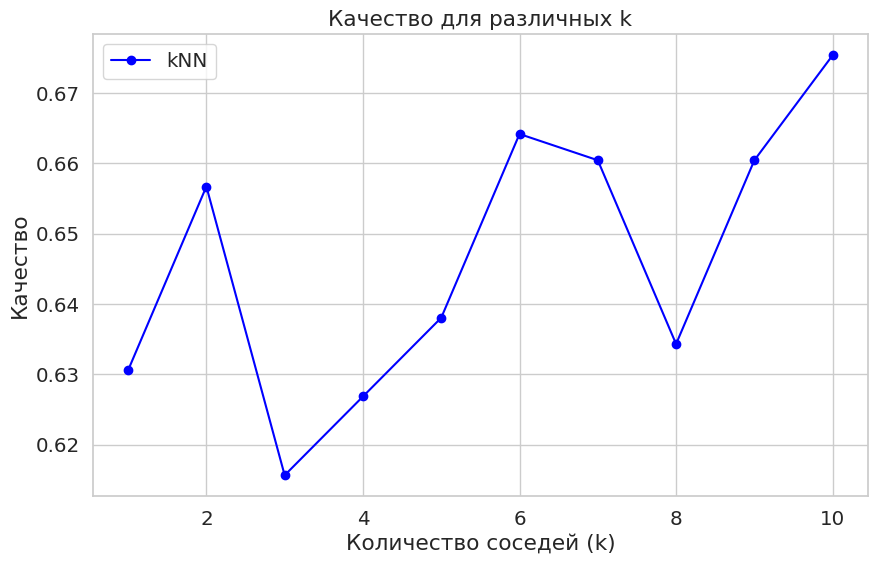

In [138]:
k_values = list(range(1, 11))
accuracy_knn_list = []

for k in k_values:
    predicted_knn = knn(test_data[['Age', 'Fare']], train_data[['Age', 'Fare']], train_data['Survived'], k=k)
    accuracy_knn_value = criteria(test_data['Survived'], predicted_knn)
    accuracy_knn_list.append(accuracy_knn_value)
    print(f'Качество для k={k}: {accuracy_knn_list[-1]:.4f}')

plt.figure(figsize=(10, 6))  # Построение графика зависимости критерия качества от значения k
plt.plot(k_values, accuracy_knn_list, marker='o', linestyle='-', color='blue', label='kNN')
plt.title('Качество для различных k')
plt.xlabel('Количество соседей (k)')
plt.ylabel('Качество')
plt.legend()
plt.grid(True)
plt.show()


По данным показанных на графике видно, что при увеличении количество соседей качество предсказания улучшается. Но при определенных значениях могут быть выбросы из-за которых качество снижается. Данный тест показывает что конкретно в данном случае возраст и стоимость тарифа при учете метода kNN не точно предсказывает исход.

#### 6. Выводы

Эксперимент показал, что выживших можно разделить на две группы по полу. С помощью деревьев выяснилось, что пол имел значительное влияние на качество предсказания и выживаемость. Из результатов второго дерева видно, что класс каюты в котором находился пассажир имел так же большое влияние на исход события.

Используя метод kNN с параметрами возраста и стоимости тарифа стало ясно, что они на выживаемость не имели сильное отношение.

Анализ размера семьи на борту показал разные тенденции для мужчин и женщин. У мужчин более крупные семьи увеличивали шансы на выживание, в то время как у женщин более крупные семьи связаны с уменьшением шансов на выживание.

Общий вывод: Пол, класс каюты и размер семьи оказались важными факторами, влияющими на выживаемость на Титанике. Учет этих признаков позволяет более точно предсказывать исход события.